# Sur-echantillonage : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('trans_cleaned_df.csv')


In [3]:
#faire une copie 
df = dataset.copy()

# smote

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
X = df.drop(['isFraud'], axis = 1)
y = df[['isFraud']]

In [6]:
# Diviser l'ensemble d'entraînement en ensembles d'entraînement, de validation et de test

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [7]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the dataset

sm = SMOTE(random_state=4)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
print(y.isFraud.value_counts())
print(y_smote.isFraud.value_counts())


isFraud
0    615726
1      8830
Name: count, dtype: int64
isFraud
0    615726
1    615726
Name: count, dtype: int64


In [8]:
y_smote.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


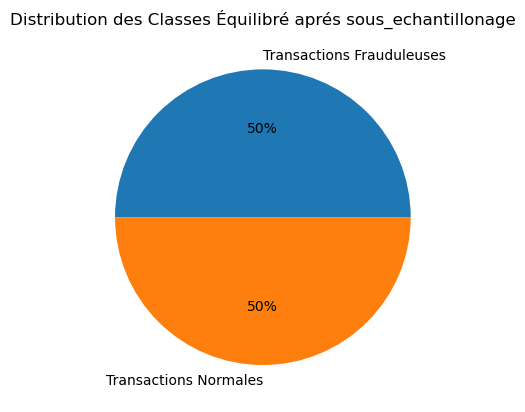

In [9]:
# Afficher la distribution équilibré de du nouvel ensemble de données en comembaire : 

plt.pie(y_smote.value_counts(),
labels=['Transactions Frauduleuses', 'Transactions Normales'],
autopct='%1.0f%%')
        
plt.title('Distribution des Classes Équilibré aprés sous_echantillonage')
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [11]:
X_sm = X_smote
y_sm = y_smote

In [12]:
from sklearn.model_selection import train_test_split

# Divisez les données suréchantillonnées en ensembles d'entraînement (70%), de validation (15%) et de test (15%)
X_sm_train, X_sm_temp, y_sm_train, y_sm_temp = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
X_sm_val, X_sm_test, y_sm_val, y_sm_test = train_test_split(X_sm_temp, y_sm_temp, test_size=0.5, random_state=42)

# Affichez la taille de chaque ensemble
print("Train set shape:", X_sm_train.shape)
print("Validation set shape:", X_sm_val.shape)
print("Test set shape:", X_sm_test.shape)


Train set shape: (862016, 11)
Validation set shape: (184718, 11)
Test set shape: (184718, 11)


Decision Tree - Validation Set Metrics:
Accuracy: 0.9705442891326238
Precision: 0.9644440172172557
Recall: 0.9771453305919273
ROC AUC: 0.9705406420693743


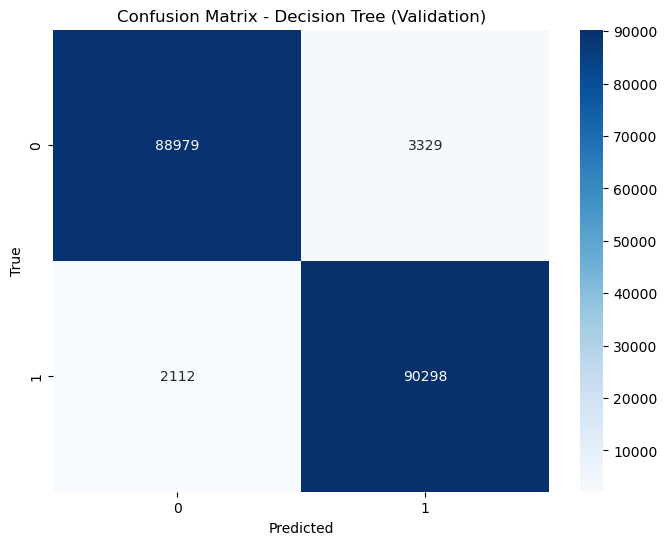


Decision Tree - Test Set Metrics:
Accuracy: 0.9699217185114607
Precision: 0.9643032725562705
Recall: 0.9760282122844595
ROC AUC: 0.9699162258700028


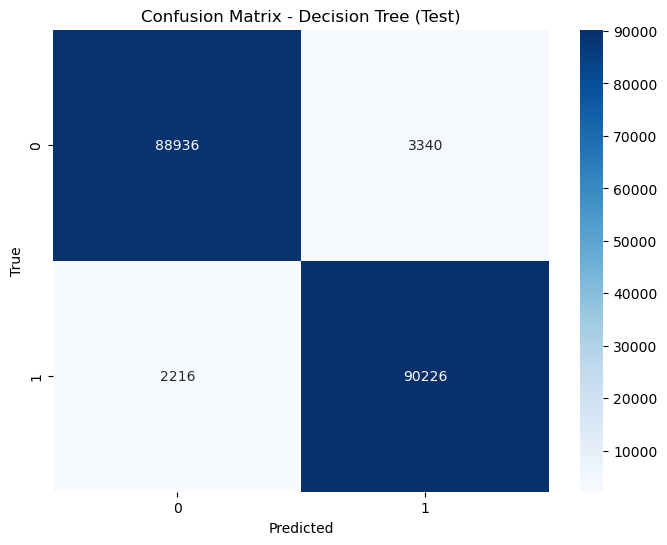

In [17]:
# Créer et entraîner un modèle Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_sm_train, y_sm_train)

# Valider le modèle sur l'ensemble de validation
y_sm_val_pred = model_dt.predict(X_sm_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_val = accuracy_score(y_sm_val, y_sm_val_pred)
precision_val = precision_score(y_sm_val, y_sm_val_pred)
recall_val = recall_score(y_sm_val, y_sm_val_pred)
roc_auc_val = roc_auc_score(y_sm_val, y_sm_val_pred)

print("Decision Tree - Validation Set Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("ROC AUC:", roc_auc_val)

# Afficher la matrice de confusion avec Seaborn
confusion_matrix_val = confusion_matrix(y_sm_val, y_sm_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Decision Tree (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prédire sur l'ensemble de test
y_sm_test_pred = model_dt.predict(X_sm_test)

# Évaluer les performances du modèle sur l'ensemble de test
accuracy_test = accuracy_score(y_sm_test, y_sm_test_pred)
precision_test = precision_score(y_sm_test, y_sm_test_pred)
recall_test = recall_score(y_sm_test, y_sm_test_pred)
roc_auc_test = roc_auc_score(y_sm_test, y_sm_test_pred)

print("\nDecision Tree - Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("ROC AUC:", roc_auc_test)

# Afficher la matrice de confusion avec Seaborn
confusion_matrix_test = confusion_matrix(y_sm_test, y_sm_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Decision Tree (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:

# Build models with hyperparameters sets
def DT_pred(X, y):
    RSC = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions={'criterion': ['gini', 'entropy'],
           'max_depth': range(1, 100, 10),
         'max_features': ['auto', 'sqrt', 'log2']},
    cv=3, scoring='roc_auc', n_jobs=-1, verbose = True)
    # Fit RandomizedSearchCV to find best hyperparameters

    search_result = RSC.fit(X, y)
    # Build models with optimized hyperparameters
    model_DT = DecisionTreeClassifier(
    criterion=search_result.best_params_["criterion"],
    max_depth=search_result.best_params_["max_depth"],
    max_features=search_result.best_params_["max_features"])

    # Split dataset into 3 consecutive folds
    kf = KFold(n_splits=3, shuffle=True, random_state=None)
    i = 1
    for train, test in kf.split(X):  
        X_train = X.iloc[train,:]
        y_train = y.iloc[train,:]
        X_test = X.iloc[test]
        y_test = y.iloc[test]
        model_DT.fit(X_train, y_train)
        train_pred = model_DT.predict(X_train)
        y_pred = model_DT.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_auc = roc_auc_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_auc = roc_auc_score(y_test, y_pred)        
        print('Fold '+ str(i), ':  Training accuracy: ', train_accuracy, 'Testing accuracy: ', test_accuracy)
        print('Fold '+ str(i), ':  Training precision: ', train_precision, 'Testing precision: ', test_precision)
        print('Fold '+ str(i), ':  Training recall: ', train_recall, 'Testing accuracy: ', test_recall)
        print('Fold '+ str(i), ':  Training auc: ', train_auc, 'Testing auc: ', test_auc)
        # Calculer la matrice de confusion pour les prédictions de test
        test_confusion_matrix = confusion_matrix(y_test, y_pred)

        # Afficher la matrice de confusion avec Seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for Testing pour le Fold {i}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fold 1 :  Training accuracy:  0.9322567992905936 Testing accuracy:  0.9218313015854455
Fold 1 :  Training precision:  0.9250010180640494 Testing precision:  0.9147082628914612
Fold 1 :  Training recall:  0.9407829341025591 Testing accuracy:  0.9304428313927997
Fold 1 :  Training auc:  0.9322573808369911 Testing auc:  0.9218301266030632


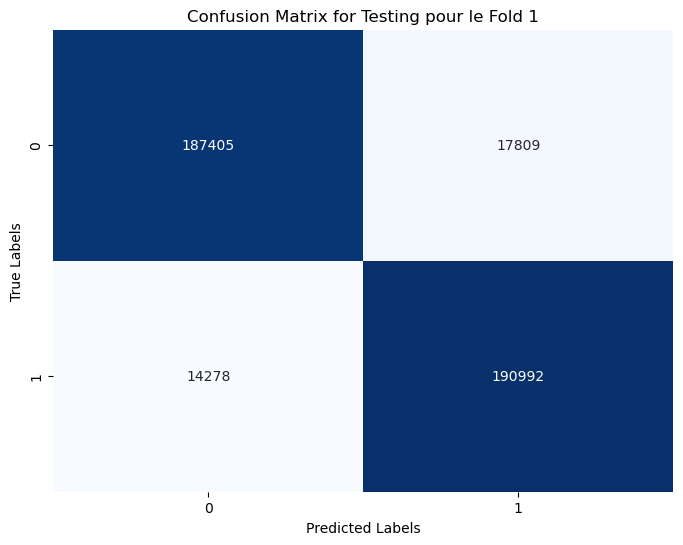

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fold 1 :  Training accuracy:  0.917870124048684 Testing accuracy:  0.9073557069215853
Fold 1 :  Training precision:  0.9109980745466563 Testing precision:  0.9000435884294274
Fold 1 :  Training recall:  0.9263092275399234 Testing accuracy:  0.9163139312604845
Fold 1 :  Training auc:  0.917866462975189 Testing auc:  0.9073634693786601


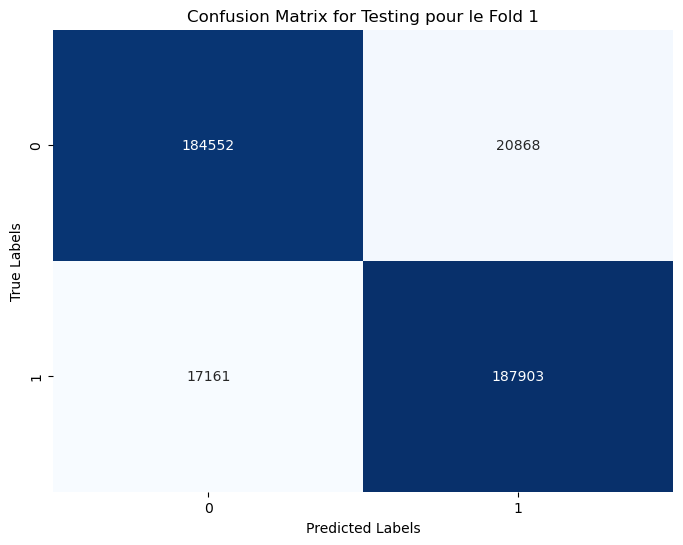

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fold 1 :  Training accuracy:  0.9290106313522574 Testing accuracy:  0.9154266670564505
Fold 1 :  Training precision:  0.928360409994841 Testing precision:  0.913215056991507
Fold 1 :  Training recall:  0.9297133554616483 Testing accuracy:  0.9182392692996806
Fold 1 :  Training auc:  0.929010888049502 Testing auc:  0.9154246099779857


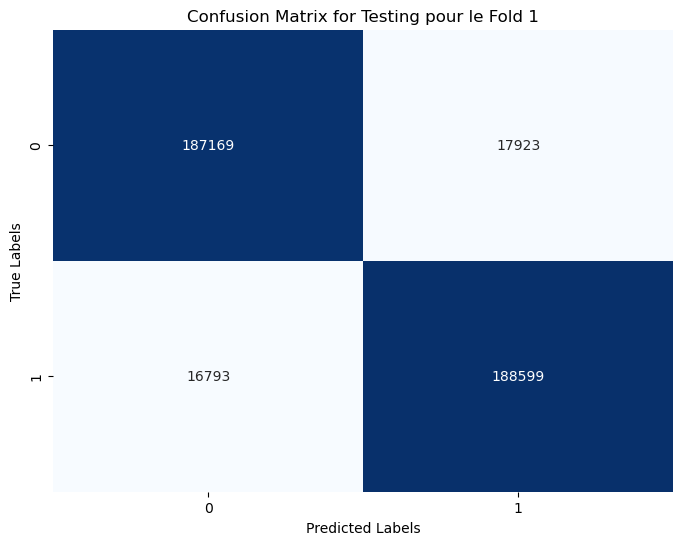

In [15]:
DT_pred(X_smote, y_smote)

In [16]:
df = df.sort_values(by='isFraud').sample(frac=1, random_state=5)